# Importing Dependencies 

In [2]:
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp

# POSE ESTIMATION FOR IMAGES

# DEclaring some important variables

In [7]:
mp_pose = mp.solutions.pose
pose_img = mp_pose.Pose(static_image_mode = True, min_detection_confidence = 0.5,model_complexity = 1)
pose_video = mp_pose.Pose(static_image_mode = False,min_detection_confidence = 0.5,min_tracking_confidence = 0.5,model_complexity = 1)
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [29]:
def estimPose_img(input_file, pose=pose_img, landmarks_c=(200,50,220), connection_c=(100,200,50), 
                   thickness=5, circle_r=5, display=True):
 
    # Read the input image
    if isinstance(input_file, str) :
        input_img = cv2.imread(input_file)
    else :
        input_img = input_file
    
    # Create a copy of the input image
    output_img = input_img.copy()
    
    # Convert the image from BGR into RGB format.
    RGB_img = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)
    
    # Perform the Pose Detection.
    results = pose.process(RGB_img)
    
    # Retrieve the height and width of the input image.
    height, width, _ = input_img.shape
    
    # Initialize a list to store the detected landmarks.
    landmarks = []
    
    # Check if any landmarks are detected.
    if results.pose_landmarks:
    
        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(output_img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS, 
                                  mp_drawing.DrawingSpec(landmarks_c, thickness, circle_r),
                                  mp_drawing.DrawingSpec(connection_c, thickness, circle_r))
        
        # Iterate over the detected landmarks.
        for landmark in results.pose_landmarks.landmark:
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))
    
    # Check if we want to display.
    if display:
        # Display the original input image and the resulting image.
        plt.figure(figsize=[10,10])
        plt.subplot(121);plt.imshow(input_img[:,:,::-1]);plt.title("Original image");plt.axis('on');
        plt.subplot(122);plt.imshow(output_img[:,:,::-1]);plt.title("Output image");plt.axis('on');
        
        # Plot the Pose landmarks in 3D.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        
    # Just get output_img and landmarks
    else:
        # Return the output image and the found landmarks.
        return output_img, landmarks

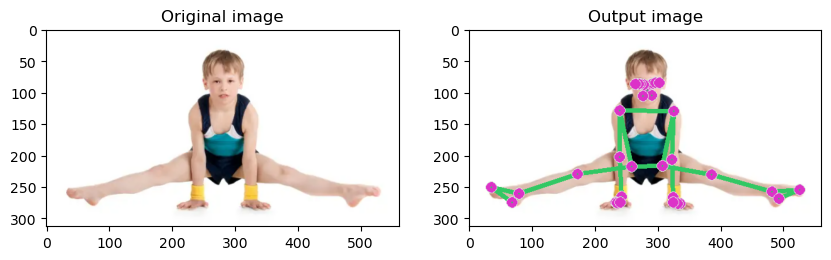

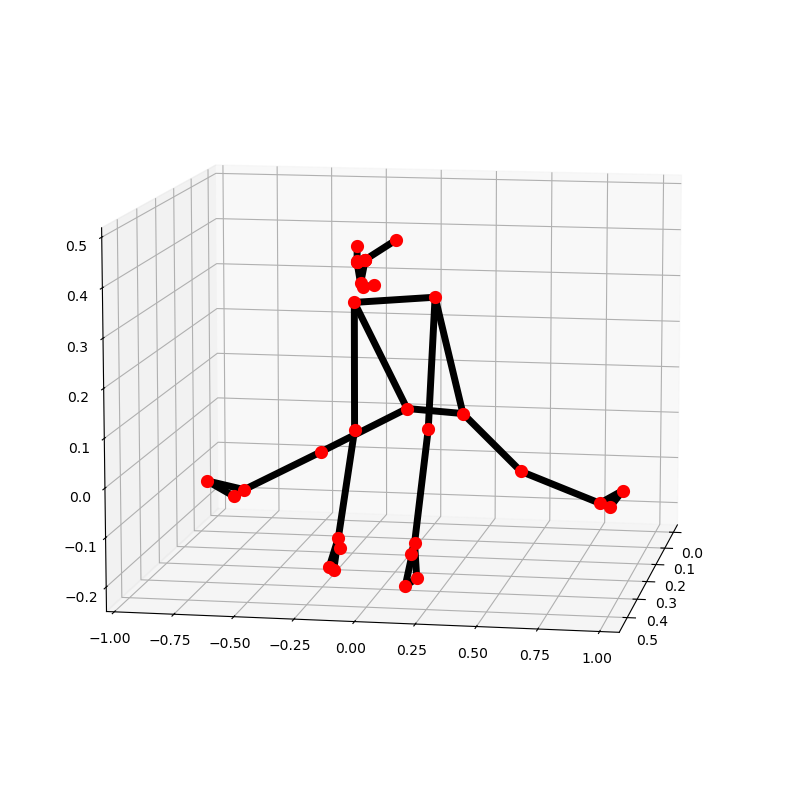

In [30]:
estimPose_img(r"C:\Users\HP\OneDrive\Pictures\Screenshots\Screenshot 2026-01-08 174621.png")

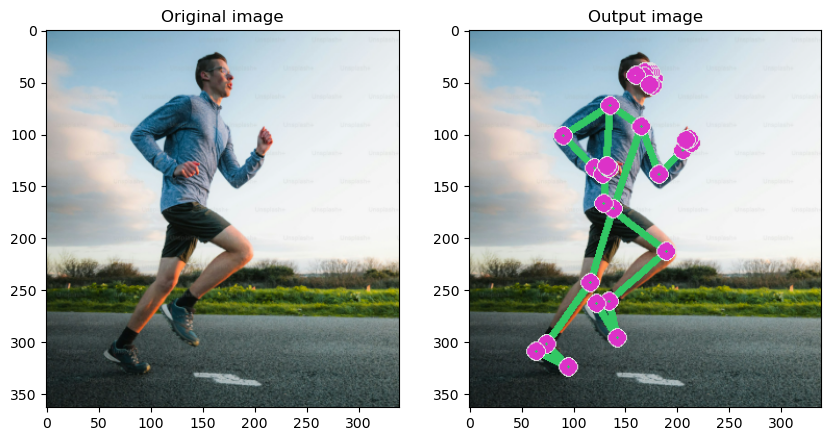

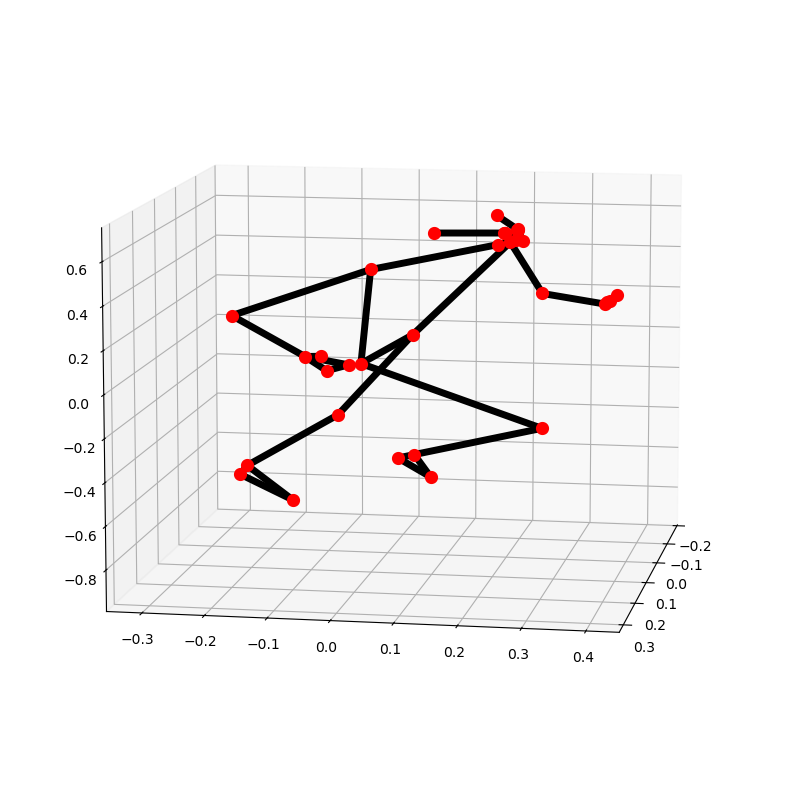

In [31]:
estimPose_img(r"C:\Users\HP\OneDrive\Pictures\Screenshots\Screenshot 2026-01-09 133237.png")

# LANDMARK DETECTION FOR VIDEOS

In [14]:
mp_pose = mp.solutions.pose.Pose(min_detection_confidence=0.7, min_tracking_confidence=0.7)
mp_drawing = mp.solutions.drawing_utils
cap = cv2.VideoCapture(r"C:\Users\HP\Downloads\21827-336300898_small.mp4")

while True:
    r, frame = cap.read()
    if not r:
        break
    
    results = mp_pose.process(frame)
    mp_drawing.draw_landmarks(
        frame, 
        results.pose_landmarks, 
        mp.solutions.pose.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=4, circle_radius=2),
        mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=6, circle_radius=2)
    )
    cv2.imshow("Frame", frame)
    
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# with webcam


In [8]:
cap = cv2.VideoCapture(0)
with mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as pose:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image)

    # Draw the pose annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Pose', cv2.flip(image, 1))
    if cv2.waitKey(1) == ord('q'):
      break
cap.release()
cv2.destroyAllWindows()

# THANK YOU HIT THE STAR BUTTON IF YOU LIKE IT 